In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import time
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup as bs4
from datetime import datetime
from time import ctime
import datetime

In [17]:
#게임 리뷰 시계열 데이터 url, requests
url = 'https://store.steampowered.com/appreviewhistogram/578080?l=koreana&review_score_preference=0'
header = {
    'referer': 'https://store.steampowered.com/app/578080/PUBG_BATTLEGROUNDS/',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'
}
resp = requests.get(url, headers = header)

In [18]:
#게임 리뷰 시계열 데이터 json
data_gr = resp.json()['results']['rollups']
data_gr

[{'date': 1488326400,
  'recommendations_up': 5954,
  'recommendations_down': 2901},
 {'date': 1491004800,
  'recommendations_up': 12934,
  'recommendations_down': 6167},
 {'date': 1493596800,
  'recommendations_up': 11751,
  'recommendations_down': 5161},
 {'date': 1496275200,
  'recommendations_up': 14753,
  'recommendations_down': 5481},
 {'date': 1498867200,
  'recommendations_up': 19215,
  'recommendations_down': 9263},
 {'date': 1501545600,
  'recommendations_up': 24984,
  'recommendations_down': 14856},
 {'date': 1504224000,
  'recommendations_up': 30908,
  'recommendations_down': 21558},
 {'date': 1506816000,
  'recommendations_up': 38146,
  'recommendations_down': 65643},
 {'date': 1509494400,
  'recommendations_up': 82333,
  'recommendations_down': 39955},
 {'date': 1512086400,
  'recommendations_up': 40583,
  'recommendations_down': 49928},
 {'date': 1514764800,
  'recommendations_up': 31767,
  'recommendations_down': 31537},
 {'date': 1517443200,
  'recommendations_up': 209

In [19]:
#게임 리뷰 시계열 데이터 data frame
df = pd.DataFrame(data_gr)
df

,date,recommendations_up,recommendations_down
0,1488326400,5954,2901
1,1491004800,12934,6167
2,1493596800,11751,5161
3,1496275200,14753,5481
4,1498867200,19215,9263
...,...,...,...
62,1651363200,11112,5712
63,1654041600,10341,5659
64,1656633600,11093,6068
65,1659312000,10744,5402


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   date                  67 non-null     int64
 1   recommendations_up    67 non-null     int64
 2   recommendations_down  67 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB


In [26]:
for i in range(0, 67):
    df['date'][i] = datetime.date.fromtimestamp(df['date'][i])
    
    
df

TypeError: an integer is required (got type datetime.date)

<function matplotlib.pyplot.show(close=None, block=None)>

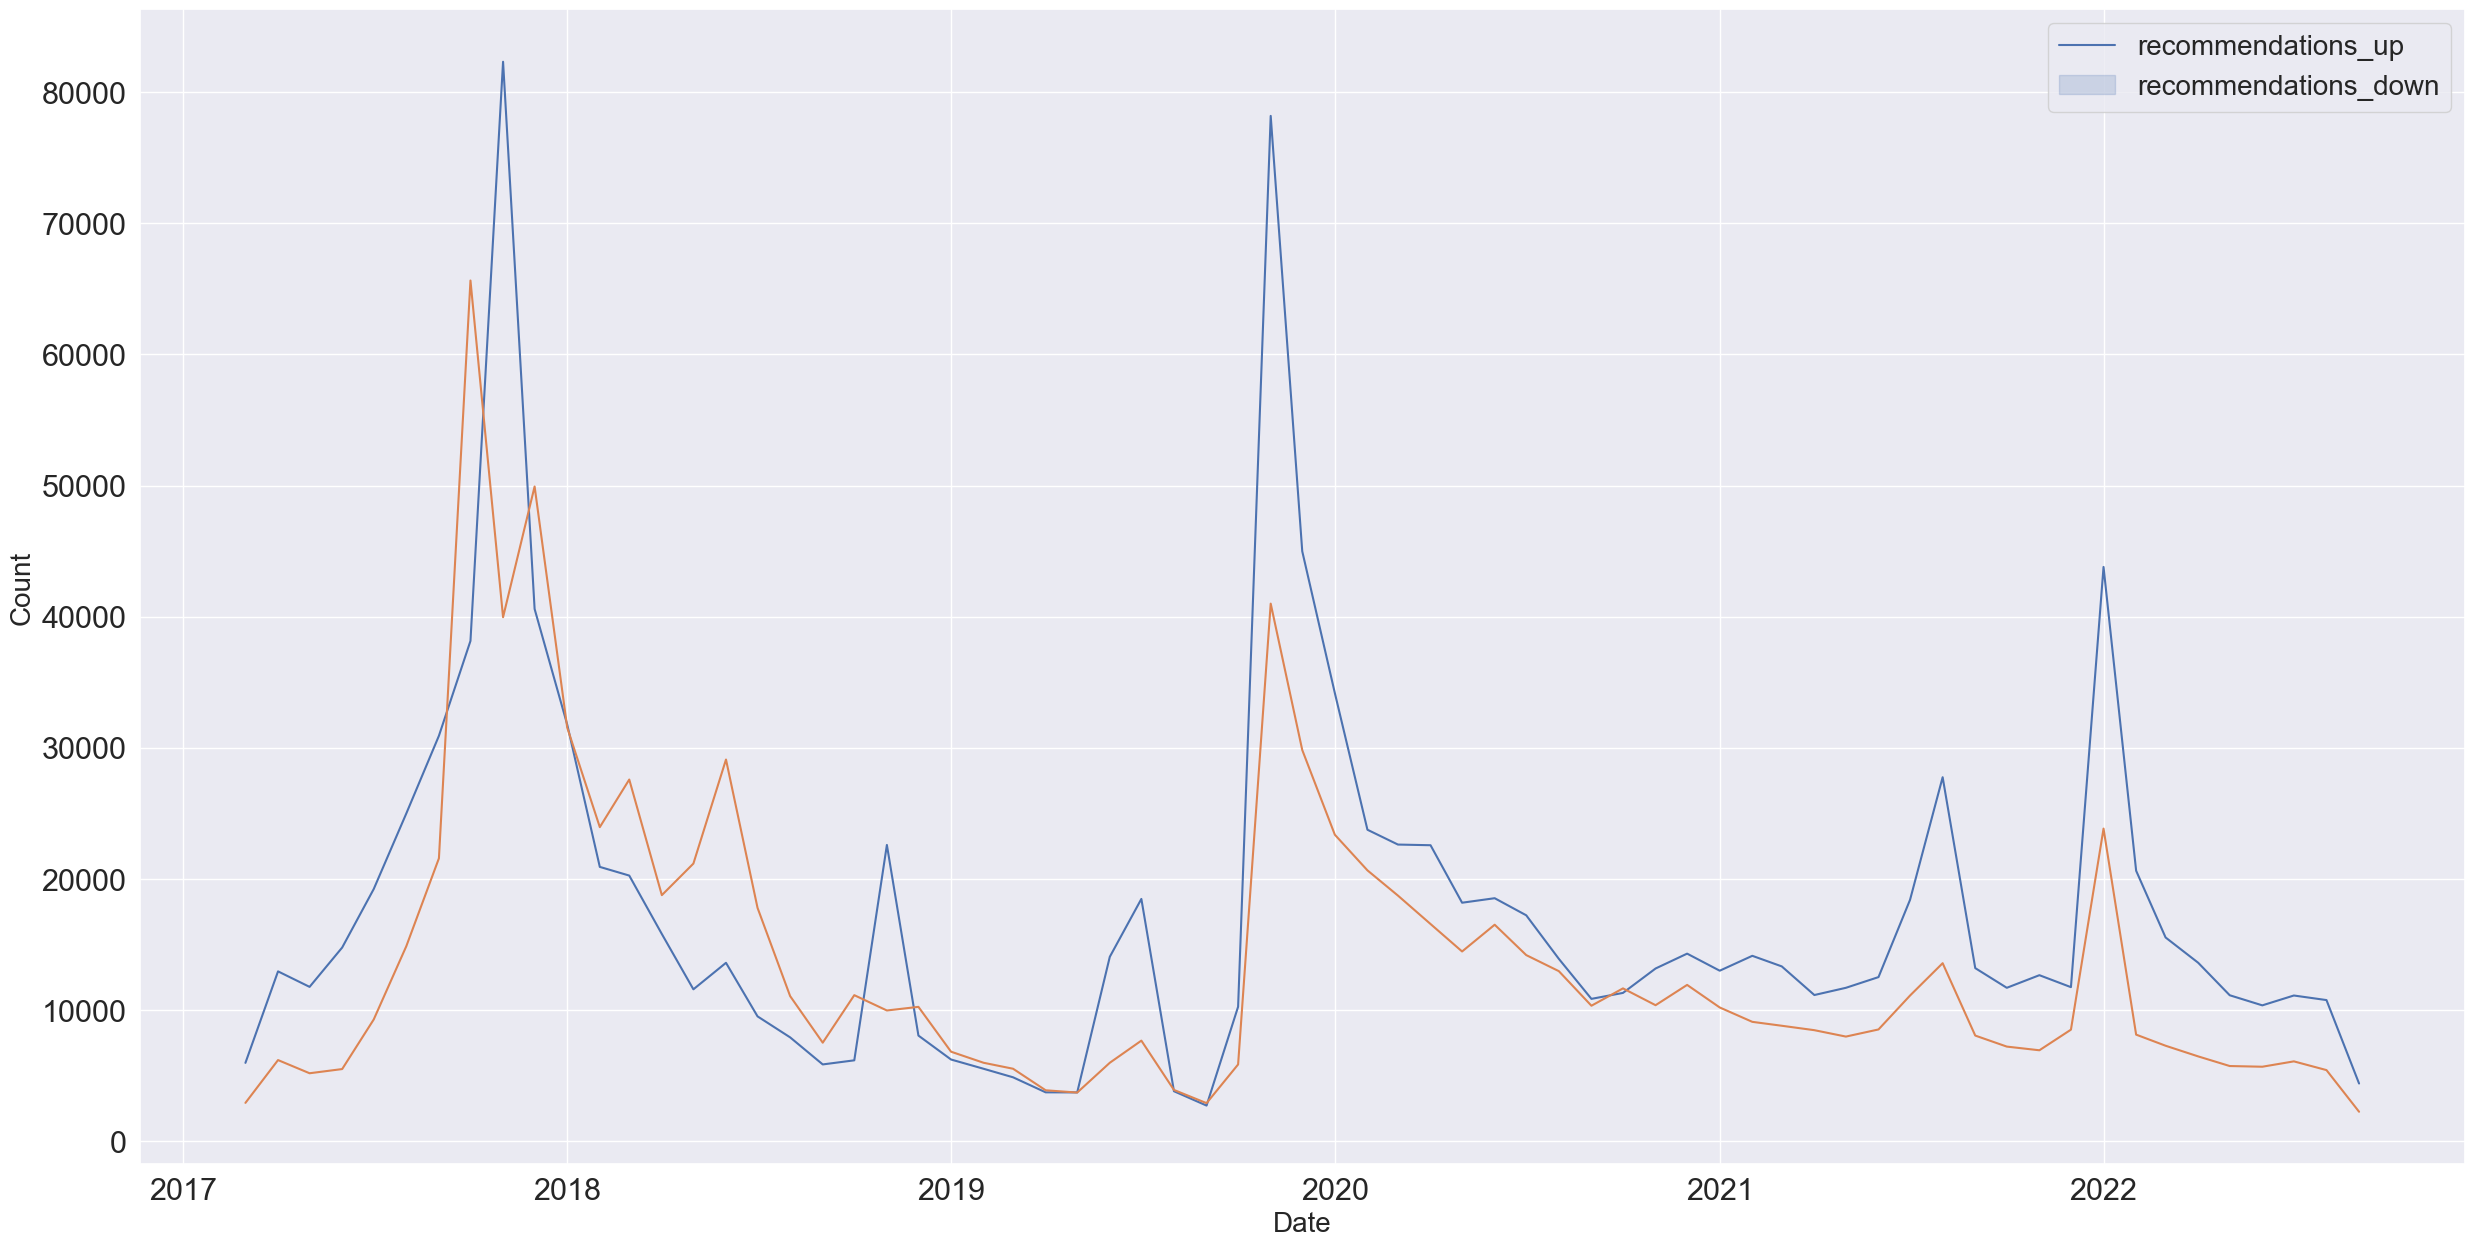

In [22]:
plt.figure(figsize = (30,15))
sns.set(font_scale=2)


sns.lineplot(data=df, x='date', y='recommendations_up')


sns.lineplot(data=df, x='date', y='recommendations_down')


plt.legend(labels = ['recommendations_up', 'recommendations_down'], fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show